In [1]:
import imports
import utils

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Dataset: phishing
	having_IP_Address's type is nominal, range is ('-1', '1')
	URL_Length's type is nominal, range is ('1', '0', '-1')
	Shortining_Service's type is nominal, range is ('1', '-1')
	having_At_Symbol's type is nominal, range is ('1', '-1')
	double_slash_redirecting's type is nominal, range is ('-1', '1')
	Prefix_Suffix's type is nominal, range is ('-1', '1')
	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
	Domain_registeration_length's type is nominal, range is ('-1', '1')
	Favicon's type is nominal, range is ('1', '-1')
	port's type is nominal, range is ('1', '-1')
	HTTPS_token's type is nominal, range is ('-1', '1')
	Request_URL's type is nominal, range is ('1', '-1')
	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
	Links_in_tags's type is nominal, range is ('1', '-1', '0')
	SFH's type is nominal, range is ('-1', '1', '0')
	Submitting_to_email's type is nominal, range is ('-1', '1')
	


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
df=imports.pd.read_excel('phising-uci-dataset.xlsx')

Defining Training and Testing Set for Classification

In [3]:
X= df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']]

y=df['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 42)

Logistic Regression

In [4]:
logreg=imports.LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [5]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1013,    0],
       [   4,  943]], dtype=int64)

In [6]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       1.00      1.00      1.00      1013
    Phishing       1.00      1.00      1.00       947

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



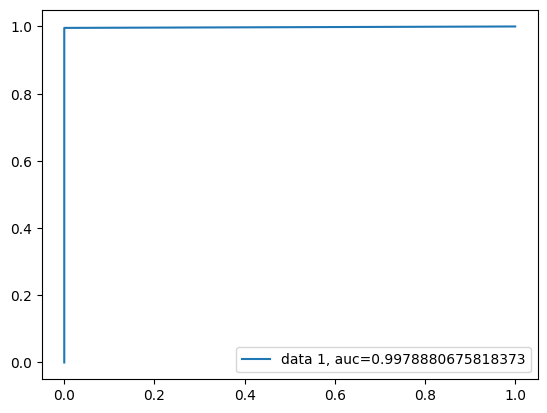

In [7]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()


In [8]:
explainer = imports.shap.Explainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814],
       ...,
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814],
       [-0.0437284 , -0.01081171, -0.43126412, ..., -0.49304842,
        -0.08070633, -0.83681998],
       [ 0.10705918,  0.04925335,  0.87559684, ...,  1.33305683,
        -0.08070633,  1.69899814]])

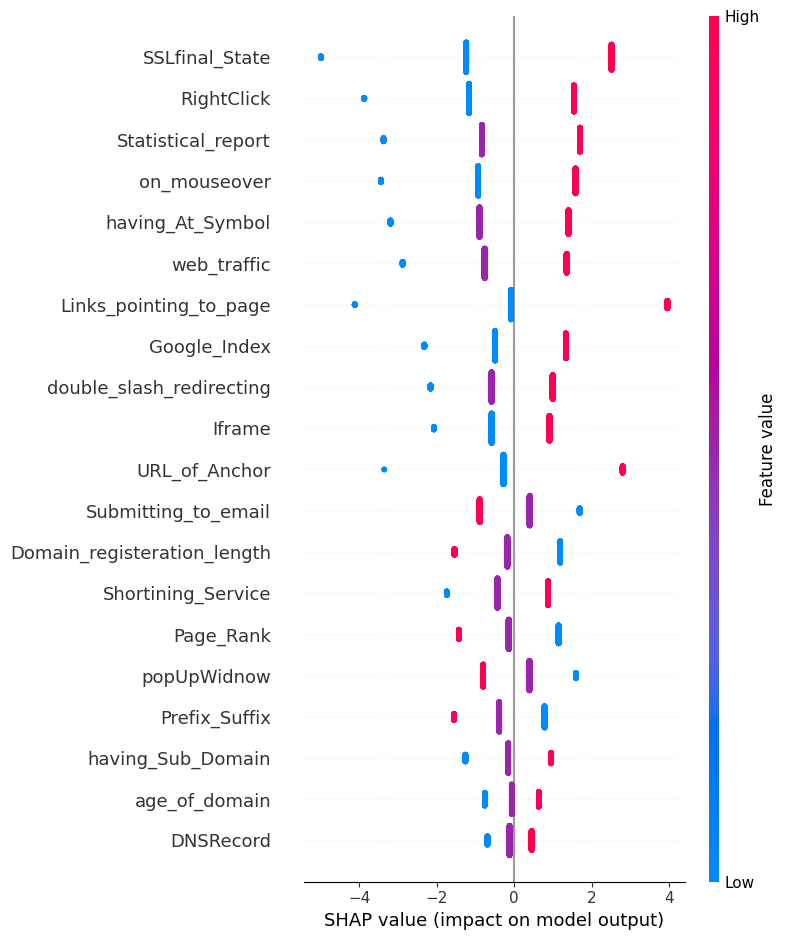

In [9]:
imports.shap.summary_plot(shap_values, X_test)

Random Forest Classifier

In [10]:
rfc = imports.RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_rfc_pred = logreg.predict(X_test)

In [11]:
cnf_rfc_matrix = imports.metrics.confusion_matrix(y_test, y_rfc_pred)
cnf_rfc_matrix

array([[1013,    0],
       [   4,  943]], dtype=int64)

In [12]:
print(imports.classification_report(y_test, y_rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       1.00      1.00      1.00      1013
    Phishing       1.00      1.00      1.00       947

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



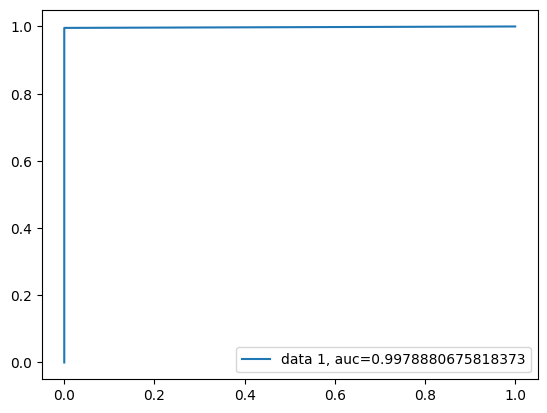

In [13]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_rfc_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_rfc_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()


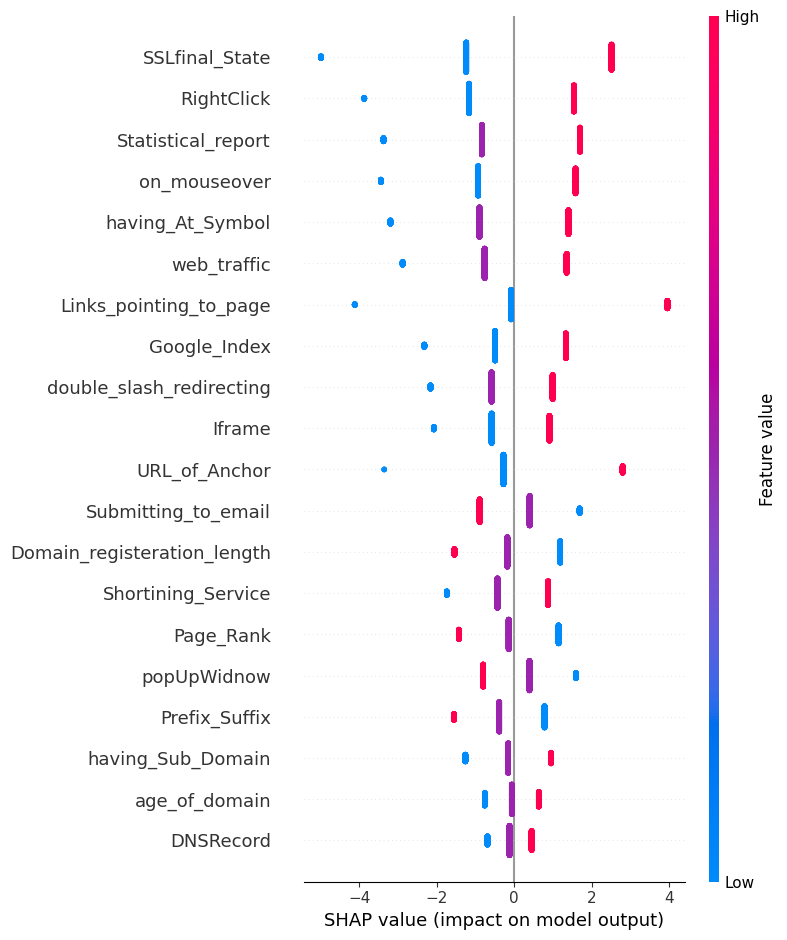

In [14]:
explainer = imports.shap.Explainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)
imports.shap.summary_plot(shap_values, X_test)

In [15]:
# Calculate the absolute SHAP values for each feature
abs_shap_values = imports.np.abs(shap_values)

# Calculate the mean absolute SHAP values for each feature across all instances
mean_abs_shap_values = imports.np.mean(abs_shap_values, axis=0)

# Create a DataFrame to store feature names and their mean absolute SHAP values
shap_df = imports.pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_ABS_SHAP': mean_abs_shap_values
})

# Sort the DataFrame by mean absolute SHAP values in descending order
shap_df_sorted = shap_df.sort_values(by='Mean_ABS_SHAP', ascending=False)

# Print the sorted DataFrame
print(shap_df_sorted)


                        Feature  Mean_ABS_SHAP
7                SSLfinal_State       1.940597
20                   RightClick       1.398919
29           Statistical_report       1.354153
19                 on_mouseover       1.331867
3              having_At_Symbol       1.251067
25                  web_traffic       1.102174
28       Links_pointing_to_page       0.956370
27                 Google_Index       0.944693
4      double_slash_redirecting       0.853445
22                       Iframe       0.794591
13                URL_of_Anchor       0.748077
16          Submitting_to_email       0.704004
8   Domain_registeration_length       0.703264
2            Shortining_Service       0.701398
26                    Page_Rank       0.674026
21                  popUpWidnow       0.665377
5                 Prefix_Suffix       0.661853
6             having_Sub_Domain       0.496703
23                age_of_domain       0.366858
24                    DNSRecord       0.314979
15           

# New Dataset with top Address bar based contributing features from SHAP values

In [16]:
X= df[['having_Sub_Domain', 'having_At_Symbol', 'double_slash_redirecting', 'Shortining_Service', 'Prefix_Suffix']]

y=df['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 43)

In [17]:
logreg=imports.LogisticRegression(random_state=43)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [18]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[998,   0],
       [120, 842]], dtype=int64)

In [19]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       0.89      1.00      0.94       998
    Phishing       1.00      0.88      0.93       962

    accuracy                           0.94      1960
   macro avg       0.95      0.94      0.94      1960
weighted avg       0.95      0.94      0.94      1960



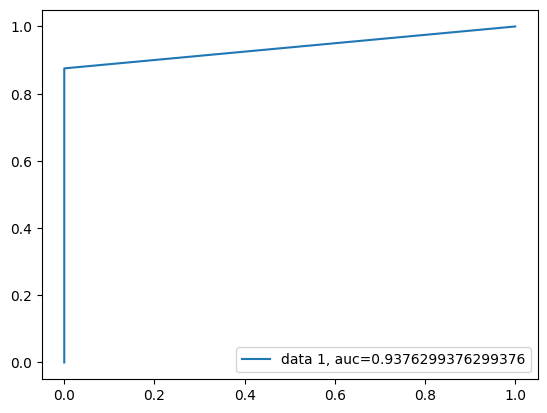

In [20]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()


In [21]:
df_legit = imports.pd.read_csv('Legit_urls.csv')
df_fake = imports.pd.read_csv('Phishing_URLs.csv')

In [22]:
df_legit['Result'] = 1
df_fake['Result'] = 0
df_new = imports.pd.concat([df_legit, df_fake], ignore_index=True)
df_new

,URL,Result
0,https://www.southbankmosaics.com,1
1,https://www.uni-mainz.de,1
2,https://www.voicefmradio.co.uk,1
3,https://www.sfnmjournal.com,1
4,https://www.rewildingargentina.org,1
...,...,...
235790,https://ww.prestamo.enlinea.pe.vpphoangha.vn/,0
235791,http://goldenrod-motley-texture.glitch.me/hvwa...,0
235792,https://bancolombia.com1home0892.repl.co/?2,0
235793,https://aol-108318.weeblysite.com/,0


Function 1: Feature mapping of 'having_At_Symbol'

In [23]:
def having_at(x):
    if '@' in x:
        return -1
    else:
        return 1

In [24]:
df_new['having_At_Symbol'] = df_new['URL']
df_new['having_At_Symbol'] = df_new['having_At_Symbol'].apply(having_at)
df_new['having_At_Symbol'].value_counts()

 1    234288
-1      1507
Name: having_At_Symbol, dtype: int64

Function 2: Feature mapping of 'double slashes'

In [25]:
def having_double_slashes(x):
    if x.rfind('//')>7:
        return -1
    else:
        return 1

In [26]:
df_new['double_slash_redirecting'] = df_new['URL']
df_new['double_slash_redirecting'] = df_new['double_slash_redirecting'].apply(having_double_slashes)
df_new['double_slash_redirecting'].value_counts()

 1    234864
-1       931
Name: double_slash_redirecting, dtype: int64

Function 3: Feature mapping of 'sub domain'

In [27]:
def classify_domain(url):
    # Remove 'www.' if present
    if url.startswith('http://www.'):
        url = url.replace('http://www.', 'http://')
    elif url.startswith('https://www.'):
        url = url.replace('https://www.', 'https://')

    # Extract the domain part from the URL
    domain = url.split('/')[2]

    # Remove the country-code top-level domain (ccTLD) if exists
    ccTLDs = ['.com', '.org', '.net', '.edu', '.gov', '.int', '.mil', '.arpa', '.biz', '.info', '.name', '.pro', '.aero', '.coop', '.museum', '.asia', '.cat', '.jobs', '.mobi', '.tel', '.travel']
    for ccTLD in ccTLDs:
        if domain.endswith(ccTLD):
            domain = domain[:-len(ccTLD)]
            break

    # Count the number of dots in the domain
    dots_count = domain.count('.')

    # Classify the URL based on the number of dots
    if dots_count == 1:
        return 1  # Legitimate
    elif dots_count == 2:
        return 0  # Suspicious
    else:
        return -1  # Phishing

In [28]:
df_new['having_Sub_Domain'] = df_new['URL']
df_new['having_Sub_Domain'] = df_new['having_Sub_Domain'].apply(classify_domain)
df_new['having_Sub_Domain'].value_counts()

-1    132334
 1     63168
 0     40293
Name: having_Sub_Domain, dtype: int64

Function 4: Feature mapping of 'Shortening Service'

In [29]:
def check_phishing(url):
    # Check if the URL starts with 'http://' or 'https://'
    if url.startswith('http://') or url.startswith('https://'):
        # Check if the URL contains 'bit.ly/', 'tinyurl.com/', or 'tiny.cc/'
        if 'bit.ly/' in url or 'tinyurl.com/' in url or 'tiny.cc/' in url:
            return -1  # Phishing
        else:
            return 1  # Legitimate
    else:
        return 0

In [30]:
df_new['Shortining_Service'] = df_new['URL']
df_new['Shortining_Service'] = df_new['Shortining_Service'].apply(check_phishing)
df_new['Shortining_Service'].value_counts()

 1    235505
-1       290
Name: Shortining_Service, dtype: int64

Function 5: Feature mapping of 'Prefix_Suffix'

In [31]:
def check_prefix_suffix(url):
    # Check if the domain name part includes a dash symbol
    if "-" in url.split("//")[-1].split("/")[0]:
        # Phishing: Domain name part includes a dash symbol
        return -1
    else:
        # Legitimate: Domain name part does not include a dash symbol
        return 1

In [32]:
df_new['Prefix_Suffix'] = df_new['URL']
df_new['Prefix_Suffix'] = df_new['Prefix_Suffix'].apply(check_prefix_suffix)
df_new['Prefix_Suffix'].value_counts()

 1    194327
-1     41468
Name: Prefix_Suffix, dtype: int64

In [33]:
df_new

,URL,Result,having_At_Symbol,double_slash_redirecting,having_Sub_Domain,Shortining_Service,Prefix_Suffix
0,https://www.southbankmosaics.com,1,1,1,-1,1,1
1,https://www.uni-mainz.de,1,1,1,1,1,-1
2,https://www.voicefmradio.co.uk,1,1,1,0,1,1
3,https://www.sfnmjournal.com,1,1,1,-1,1,1
4,https://www.rewildingargentina.org,1,1,1,-1,1,1
...,...,...,...,...,...,...,...
235790,https://ww.prestamo.enlinea.pe.vpphoangha.vn/,0,1,1,-1,1,1
235791,http://goldenrod-motley-texture.glitch.me/hvwa...,0,1,1,0,1,-1
235792,https://bancolombia.com1home0892.repl.co/?2,0,1,1,-1,1,1
235793,https://aol-108318.weeblysite.com/,0,1,1,1,1,-1


In [34]:
df_final = imports.pd.concat([df[['having_Sub_Domain', 'having_At_Symbol', 'double_slash_redirecting', 'Shortining_Service', 'Prefix_Suffix','Result']], df_new[['having_Sub_Domain', 'having_At_Symbol', 'double_slash_redirecting', 'Shortining_Service', 'Prefix_Suffix','Result']]])

In [35]:
df_final.shape

(245591, 6)

In [36]:
df_final.columns

Index(['having_Sub_Domain', 'having_At_Symbol', 'double_slash_redirecting',
       'Shortining_Service', 'Prefix_Suffix', 'Result'],
      dtype='object')

In [37]:
X= df_final[['having_Sub_Domain', 'having_At_Symbol', 'double_slash_redirecting', 'Shortining_Service', 'Prefix_Suffix']]

y=df_final['Result']

X_train, X_test, y_train, y_test = imports.train_test_split(X,y, test_size=0.2, random_state = 44)
logreg=imports.LogisticRegression(random_state=44)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [38]:
cnf_matrix = imports.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12959,  8388],
       [ 7248, 20524]], dtype=int64)

In [39]:
target_names = ['Not phishing', 'Phishing']
print(imports.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not phishing       0.64      0.61      0.62     21347
    Phishing       0.71      0.74      0.72     27772

    accuracy                           0.68     49119
   macro avg       0.68      0.67      0.67     49119
weighted avg       0.68      0.68      0.68     49119



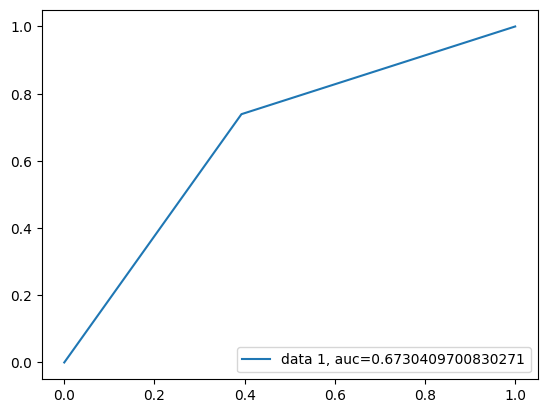

In [40]:
# Calculate ROC curve and AUC
fpr, tpr, _ = imports.metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = imports.metrics.roc_auc_score(y_test, y_pred)

# Plot ROC curve
# Convert AUC value to string before concatenating
imports.plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

imports.plt.legend(loc=4)
imports.plt.show()